# Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, we will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to make a key business decision.

## Case Study
In this project, I will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. The task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, I will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset we will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named Online Retail.xlsx. It can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Load the Data

In [3]:
import pandas as pd
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Type Of Data

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Duplicate Rows total count

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


## Total count for each Attribute

In [8]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

## Count for each attribute after removing duplicates

In [10]:
df = df.drop_duplicates()
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

## No.of null values in each attribute

In [11]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


## No.of records for each attribute after removing/dropping null/incomplete values

In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

## No.of null values for each Attribute

In [13]:
print(df.isnull().sum()) 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Top 40 products with their quantity

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(5, 0, 'POPCORN HOLDER'),
  Text(6, 0, 'RABBIT NIGHT LIGHT'),
  Text(7, 0, 'MINI PAINT SET VINTAGE '),
  Text(8, 0, 'PACK OF 12 LONDON TISSUES '),
  Text(9, 0, 'PACK OF 60 PINK PAISLEY CAKE CASES'),
  Text(10, 0, 'BROCADE RING PURSE '),
  Text(11, 0, 'VICTORIAN GLASS HANGING T-LIGHT'),
  Text(12, 0, 'ASSORTED COLOURS SILK FAN'),
  Text(13, 0, 'RED  HARMONICA IN BOX '),
  Text(14, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(15, 0, 'SMALL POPCORN HOLDER'),
  Text(16, 0, '60 TEATIME FAIRY CAKE CASES'),
  Text(17, 0, 'LUNCH BAG

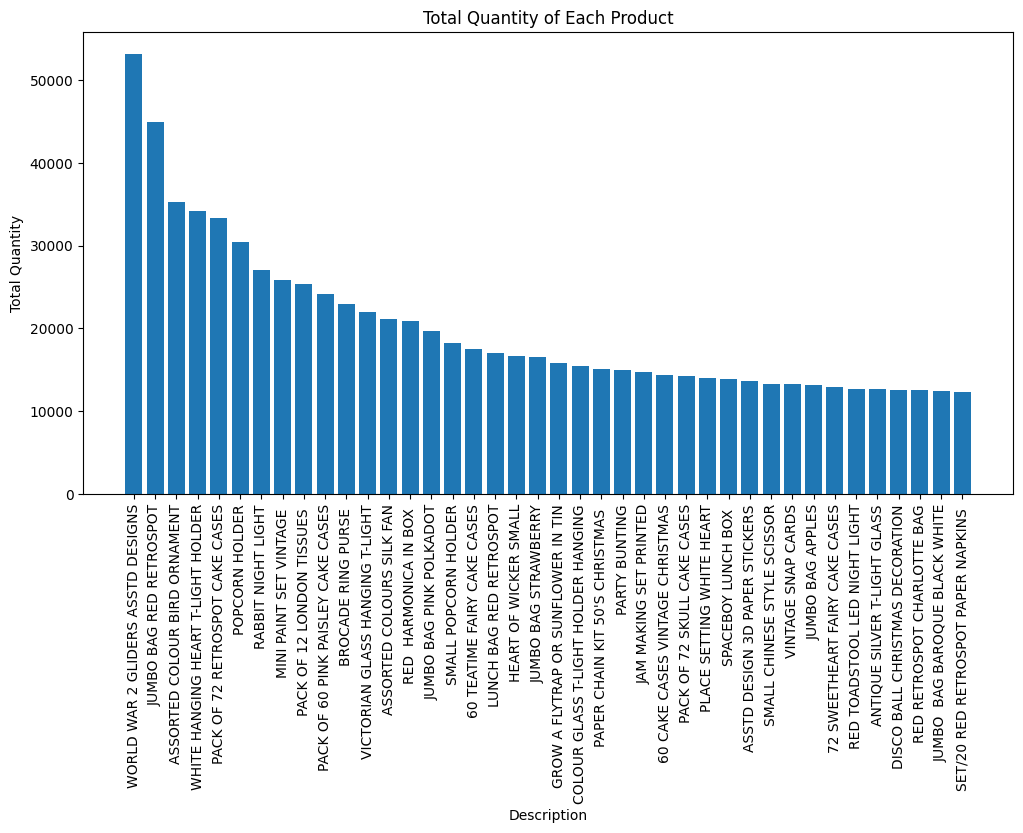

In [42]:
import matplotlib.pyplot as plt
# Aggregate the data to calculate total quantity for each product
product_totals = df.groupby('Description')['Quantity'].sum().reset_index()
top_40_products = product_totals.sort_values(by='Quantity', ascending=False).head(40)
plt.figure(figsize=(12, 6))
plt.bar(top_40_products['Description'], top_40_products['Quantity'])
plt.title('Total Quantity of Each Product')
plt.xlabel('Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)


## Analyzing particular customer's spending

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'COLOUR GLASS. STAR T-LIGHT HOLDER'),
  Text(1, 0, 'CREAM CUPID HEARTS COAT HANGER'),
  Text(2, 0, 'EDWARDIAN PARASOL BLACK'),
  Text(3, 0, 'EDWARDIAN PARASOL RED'),
  Text(4, 0, 'GIN AND TONIC MUG'),
  Text(5, 0, 'GLASS STAR FROSTED T-LIGHT HOLDER'),
  Text(6, 0, 'HAND WARMER RED POLKA DOT'),
  Text(7, 0, 'HAND WARMER RED RETROSPOT'),
  Text(8, 0, 'HAND WARMER UNION JACK'),
  Text(9, 0, 'IVORY EMBROIDERED QUILT '),
  Text(10, 0, 'JUMBO SHOPPER VINTAGE RED PAISLEY'),
  Text(11, 0, 'KNITTED UNION FLAG HOT WATER BOTTLE'),
  Text(12, 0, 'RED WOOLLY HOTTIE WHITE HEART.'),
  Text(13, 0, 'RETRO COFFEE MUGS ASSORTED'),
  Text(14, 0, 'SAVE THE PLANET MUG'),
  Text(15, 0, 'SET 7 BABUSHKA NESTING BOXES'),
  Text(16, 0, 'VINTAGE BILLBOARD DRINK ME MUG'),
  Text(17, 0, 'VINTAGE BILLBOARD LOVE/HATE MUG'),
  Text(18, 0, 'WHITE HANGING HEART T-LIGHT

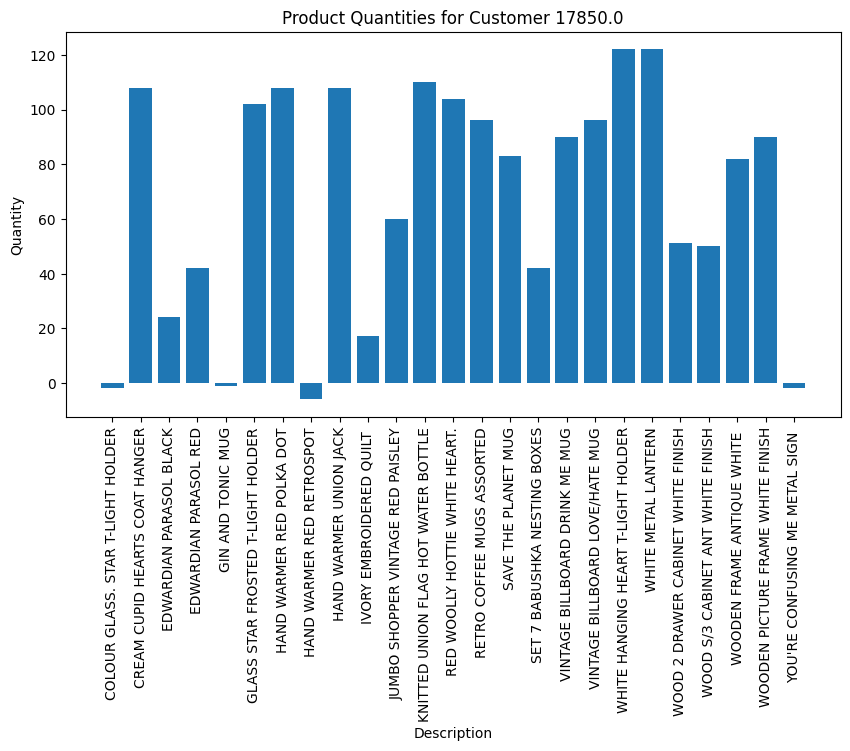

In [45]:
# Specify the customer ID you want to analyze
customer_id = 17850.0

# Filter the data for the specific customer
customer_data = df[df['CustomerID'] == customer_id]

# Group the data by product description and sum the quantities
product_totals = customer_data.groupby('Description')['Quantity'].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 5))
plt.bar(product_totals['Description'], product_totals['Quantity'])
plt.title(f'Product Quantities for Customer {customer_id}')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)

## Analysing Particular customer spending for a particular month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'CREAM CUPID HEARTS COAT HANGER'),
  Text(1, 0, 'EDWARDIAN PARASOL BLACK'),
  Text(2, 0, 'EDWARDIAN PARASOL RED'),
  Text(3, 0, 'GLASS STAR FROSTED T-LIGHT HOLDER'),
  Text(4, 0, 'HAND WARMER RED POLKA DOT'),
  Text(5, 0, 'HAND WARMER UNION JACK'),
  Text(6, 0, 'IVORY EMBROIDERED QUILT '),
  Text(7, 0, 'JUMBO SHOPPER VINTAGE RED PAISLEY'),
  Text(8, 0, 'KNITTED UNION FLAG HOT WATER BOTTLE'),
  Text(9, 0, 'RED WOOLLY HOTTIE WHITE HEART.'),
  Text(10, 0, 'RETRO COFFEE MUGS ASSORTED'),
  Text(11, 0, 'SAVE THE PLANET MUG'),
  Text(12, 0, 'SET 7 BABUSHKA NESTING BOXES'),
  Text(13, 0, 'VINTAGE BILLBOARD DRINK ME MUG'),
  Text(14, 0, 'VINTAGE BILLBOARD LOVE/HATE MUG'),
  Text(15, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(16, 0, 'WHITE METAL LANTERN'),
  Text(17, 0, 'WOOD 2 DRAWER CABINET WHITE FINISH'),
  Text(18, 0, 'WOOD S/3 CABINET ANT WHITE FINISH'),
  Text(19, 0, 'WOODEN FRAME ANTIQUE WHITE 

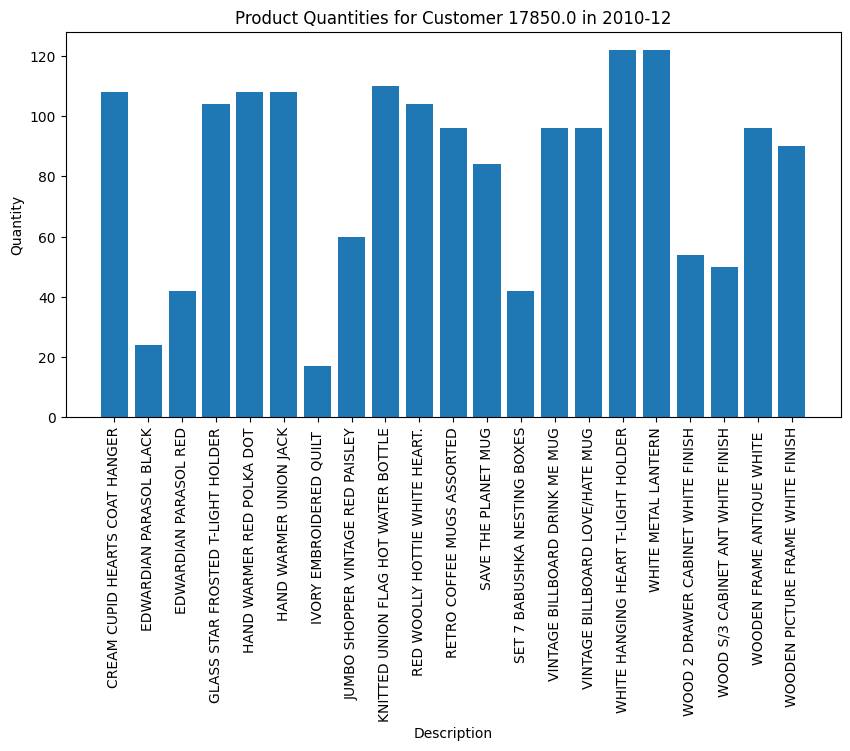

In [46]:
#Adding a filter where we can check how much quantity a customer is buying a particular month
# Convert the 'InvoiceDate' column to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' and create a new column 'Month'
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Specify the customer ID and month you want to analyze
customer_id = 17850.0
target_month = '2010-12'  # Replace with the desired month in 'YYYY-MM' format

# Filter the data for the specific customer and month
customer_data = df[(df['CustomerID'] == customer_id) & (df['Month'] == target_month)]

# Group the data by product description and sum the quantities
product_totals = customer_data.groupby('Description')['Quantity'].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 5))
plt.bar(product_totals['Description'], product_totals['Quantity'])
plt.title(f'Product Quantities for Customer {customer_id} in {target_month}')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)

## Country vs Quantity 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Channel Islands'),
  Text(15, 0, 'Denmark'),
  Text(16, 0, 'Italy'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Singapore'),
  Text(19, 0, 'Austria'),
  Text(20, 0, 'Israel'),
  Text(21, 0, 'Poland'),
  Text(22, 0, 'Canada'),
  Text(23, 0, 'Iceland'),
  Text(24, 0, 'Unspecified'),
  Text(25, 0, 'Greece'),
  Text(26, 0, 'USA'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Malta'),
  Text(29, 0, 'Lithua

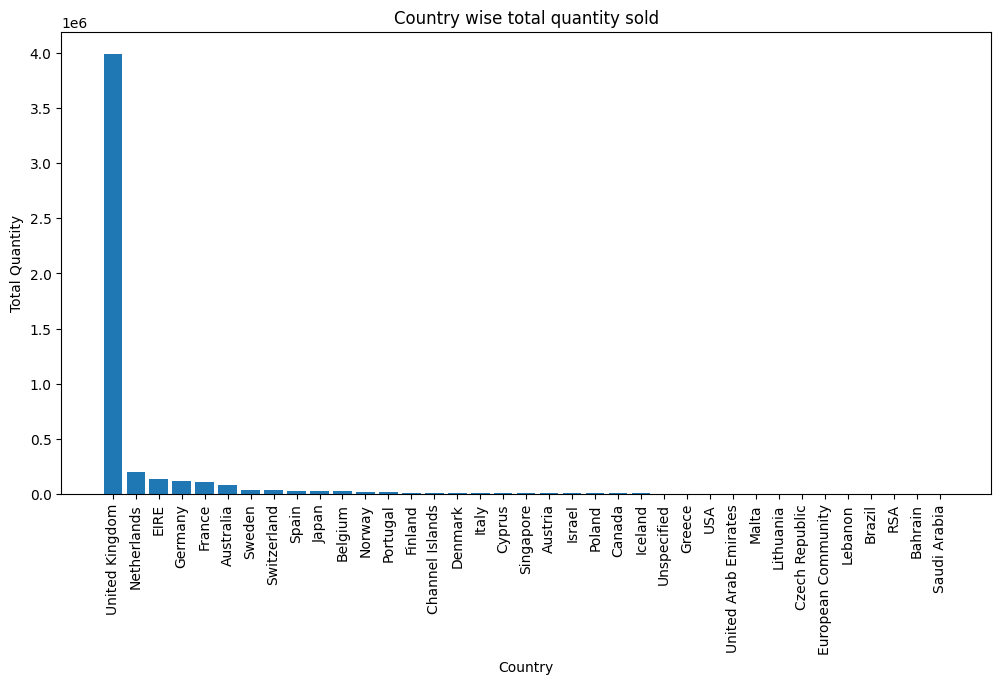

In [34]:
product_totals = df.groupby('Country')['Quantity'].sum().reset_index()
Country_wise = product_totals.sort_values(by='Quantity', ascending=False).head(40)
plt.figure(figsize=(12, 6))
plt.bar(Country_wise['Country'], Country_wise['Quantity'])
plt.title('Country wise total quantity sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)

## Comparing Each month no.of quantity sold

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

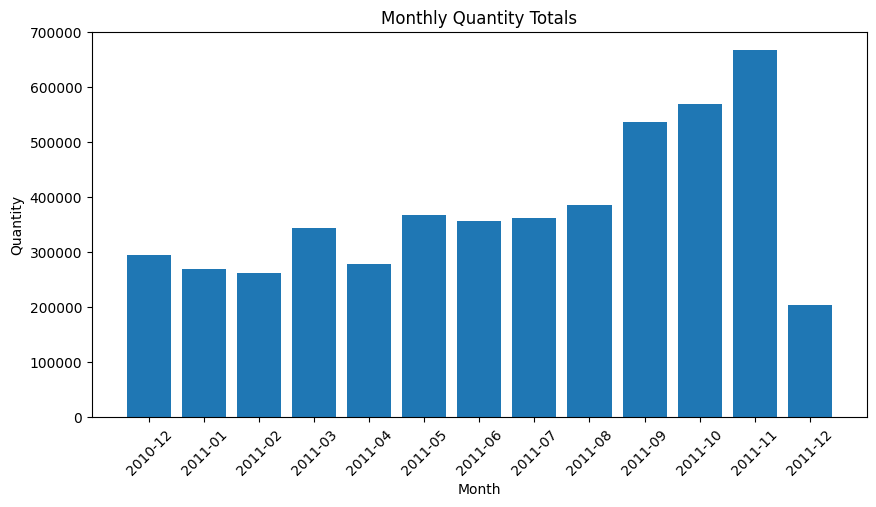

In [36]:
# Convert the 'InvoiceDate' column to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' and create a new column 'Month'
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Group the data by 'Month' and sum the 'Quantity' for each month
monthly_totals = df.groupby('Month')['Quantity'].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 5))
plt.bar(monthly_totals['Month'], monthly_totals['Quantity'])
plt.title('Monthly Quantity Totals')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45) 